# A Comparative Analysis of ML Models for Weather Prediction

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data
The data used for this project can be found here: https://drive.google.com/file/d/1twU2ZCgQIT9QXG0ErFUI7qNzTQuNqKTN/view

## Load Data

In [229]:
data = pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Size of Data

In [231]:
data.shape

(8784, 8)

In [232]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [233]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Types of Weather

In [236]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [237]:
print(data.Weather.unique())

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


In [238]:
print(data.Weather.nunique())

50


## Converting the Weather Categories into Standard Categories

In [240]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [241]:
list_of_lists = [word.split() for word in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [242]:
#Function Flatten list
def flattened_list(matrix):
    flat_list=[]
    for row in list_of_lists:
        flat_list.extend(row)
    return flat_list
    
weather_flattened_list=flattened_list(list_of_lists)
weather_flattened_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

### Output Weather from the flattened list

In [244]:
def get_weather(weather_flattened_list):
    if 'Fog' in weather_flattened_list:
        return 'Fog'
    elif 'Rain' and 'Fog' in weather_flattened_list:
        return 'Fog+Rain'
    elif 'Rain' in weather_flattened_list:
        return 'Rain'
    elif 'Snow' in weather_flattened_list:
        return 'Snow'
    elif 'Snow' and 'Rain' in weather_flattened_list:
        return 'Snow+Rain'
    elif 'Clear' in weather_flattened_list:
        return 'Clear'
    elif 'Cloudy' in weather_flattened_list:
        return 'Cloudy'
    else: 
        return 'Rain'        

In [245]:
get_weather(weather_flattened_list)

'Fog'

In [246]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [247]:
data['Std_Weather'] = data['Weather'].apply(lambda x: get_weather(x))

In [248]:
data.Std_Weather.unique()

array(['Fog', 'Cloudy', 'Rain', 'Clear', 'Snow'], dtype=object)

In [249]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy    3797
Clear     3432
Rain       629
Snow       500
Fog        426
Name: count, dtype: int64

In [250]:
# Using the top 4 most occuring weather
cloudy_df = data[data['Std_Weather']=='Cloudy']
cloudy_df_sample = cloudy_df.sample(600)
cloudy_df_sample.shape

(600, 9)

In [251]:
clear_df = data[data['Std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

## Sampling and Data Balancing

In [253]:
rain_df  = data[data['Std_Weather']=='Rain']
snow_df  = data[data['Std_Weather']=='Snow']

In [254]:
rain_df.shape

(629, 9)

In [255]:
# Check
data[data['Std_Weather']=='Rain']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain,Rain
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers,Rain
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,Rain
154,1/7/2012 10:00,-5.7,-8.0,84,7,8.0,100.13,Freezing Rain,Rain
...,...,...,...,...,...,...,...,...,...
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain,Rain
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain,Rain
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain,Rain
8541,12/21/2012 21:00,1.3,0.4,94,22,9.7,97.64,Rain,Rain


In [256]:
snow_df.shape

(500, 9)

## Create New Weather Dataset

In [258]:
weather_df = pd.concat([cloudy_df_sample,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2129,3/29/2012 17:00,3.5,-4.1,57,24,24.1,100.92,Cloudy,Cloudy
6974,10/17/2012 14:00,12.0,2.4,52,0,48.3,100.88,Mostly Cloudy,Cloudy
2533,4/15/2012 13:00,19.8,10.1,54,32,48.3,100.68,Mostly Cloudy,Cloudy
4731,7/16/2012 3:00,20.8,19.2,91,7,25.0,100.52,Cloudy,Cloudy
8254,12/9/2012 22:00,-3.0,-8.2,67,28,25.0,101.78,Cloudy,Cloudy


In [259]:
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2129,3/29/2012 17:00,3.5,-4.1,57,24,24.1,100.92,Cloudy,Cloudy
6974,10/17/2012 14:00,12.0,2.4,52,0,48.3,100.88,Mostly Cloudy,Cloudy
2533,4/15/2012 13:00,19.8,10.1,54,32,48.3,100.68,Mostly Cloudy,Cloudy
4731,7/16/2012 3:00,20.8,19.2,91,7,25.0,100.52,Cloudy,Cloudy
8254,12/9/2012 22:00,-3.0,-8.2,67,28,25.0,101.78,Cloudy,Cloudy


In [260]:
weather_df.shape

(2329, 9)

In [261]:
weather_df.Std_Weather.value_counts()

Std_Weather
Rain      629
Cloudy    600
Clear     600
Snow      500
Name: count, dtype: int64

## Drop Columns date & Weather

In [263]:
weather_df.drop(columns=['Date/Time','Weather'], axis=1, inplace=True)

In [264]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2129,3.5,-4.1,57,24,24.1,100.92,Cloudy
6974,12.0,2.4,52,0,48.3,100.88,Cloudy
2533,19.8,10.1,54,32,48.3,100.68,Cloudy
4731,20.8,19.2,91,7,25.0,100.52,Cloudy
8254,-3.0,-8.2,67,28,25.0,101.78,Cloudy


## Duplicate Records

In [266]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


### Null or Missing Values

In [268]:
null_values = weather_df.isnull().sum()
null_values

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [269]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2329 entries, 2129 to 8783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            2329 non-null   float64
 1   Dew Point Temp_C  2329 non-null   float64
 2   Rel Hum_%         2329 non-null   int64  
 3   Wind Speed_km/h   2329 non-null   int64  
 4   Visibility_km     2329 non-null   float64
 5   Press_kPa         2329 non-null   float64
 6   Std_Weather       2329 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 145.6+ KB


## Data Visualization

In [271]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,6.785616,1.712924,72.238300,16.672821,23.481065,100.801593
std,11.427490,10.619707,15.619272,9.503542,12.545928,0.916368
min,-19.300000,-26.100000,20.000000,0.000000,0.600000,97.520000
25%,-3.000000,-6.700000,62.000000,9.000000,16.100000,100.290000
50%,5.500000,0.700000,76.000000,15.000000,24.100000,100.820000
75%,16.600000,10.800000,84.000000,22.000000,25.000000,101.380000
max,33.000000,23.100000,99.000000,70.000000,48.300000,103.650000


### Correlation among the features

In [273]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

In [274]:
columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa']
corr_matrix = weather_df[columns].corr()
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.945441,-0.222289,-0.122760,0.368548,-0.123964
Dew Point Temp_C,0.945441,1.000000,0.101669,-0.110373,0.170926,-0.231498
Rel Hum_%,-0.222289,0.101669,1.000000,0.053882,-0.637908,-0.336268
Wind Speed_km/h,-0.122760,-0.110373,0.053882,1.000000,-0.163052,-0.403961
Visibility_km,0.368548,0.170926,-0.637908,-0.163052,1.000000,0.329595
Press_kPa,-0.123964,-0.231498,-0.336268,-0.403961,0.329595,1.000000


### Heat map to check for Correlation

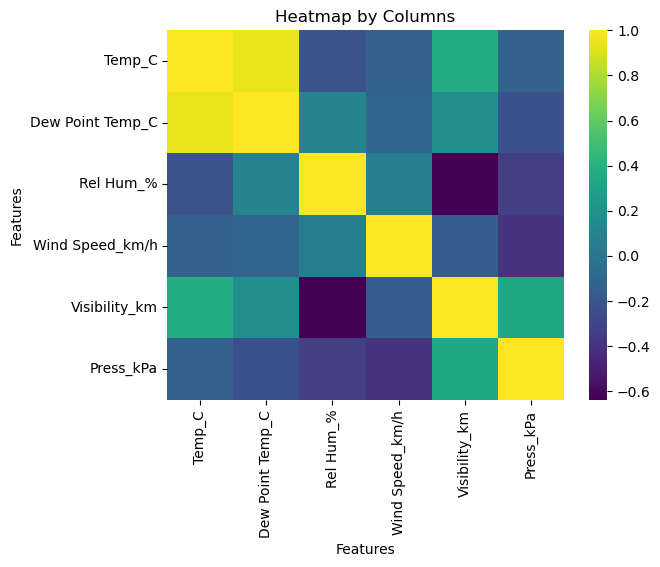

In [276]:
sns.heatmap(corr_matrix, annot=False, cmap='viridis')  # Adjust cmap as needed
plt.title('Heatmap by Columns')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<Axes: ylabel='Frequency'>

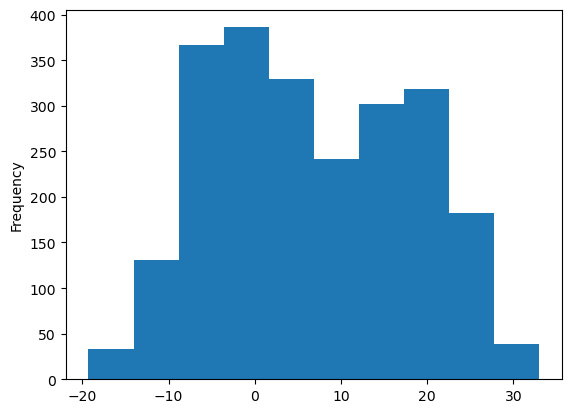

In [277]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

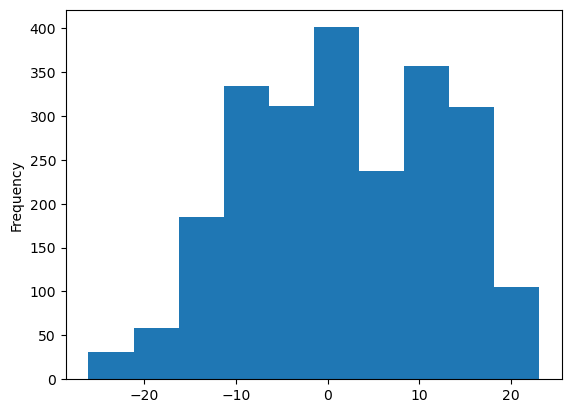

In [278]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

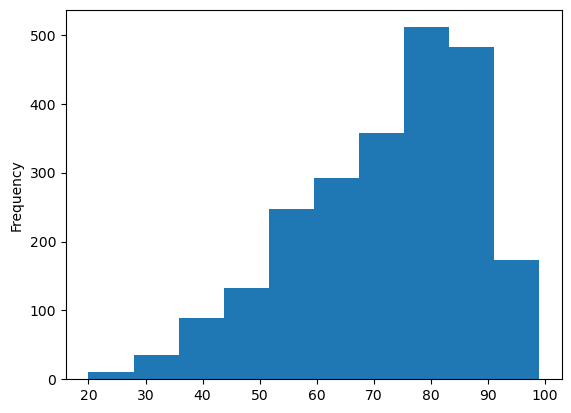

In [279]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

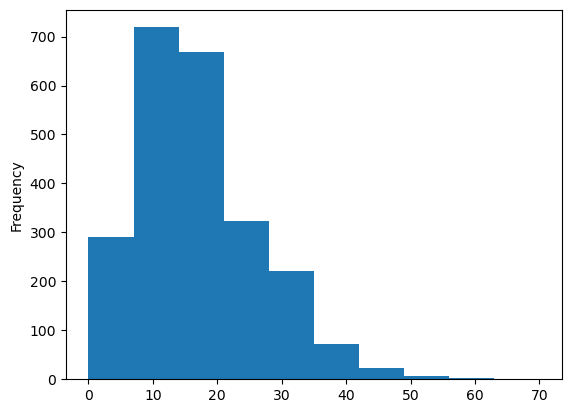

In [280]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

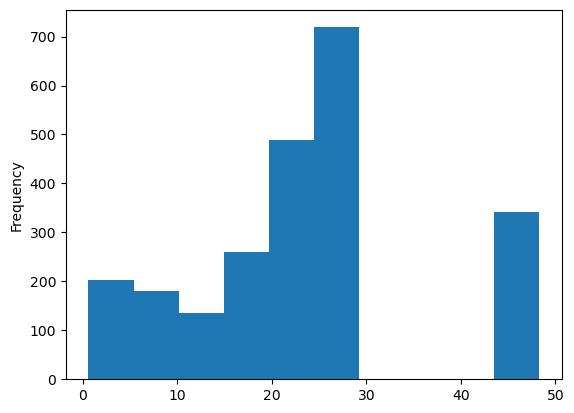

In [281]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

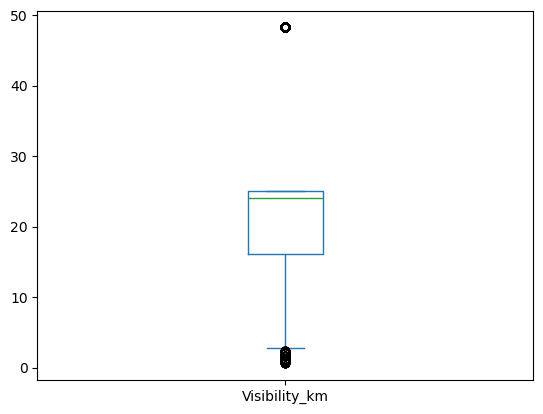

In [282]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: >

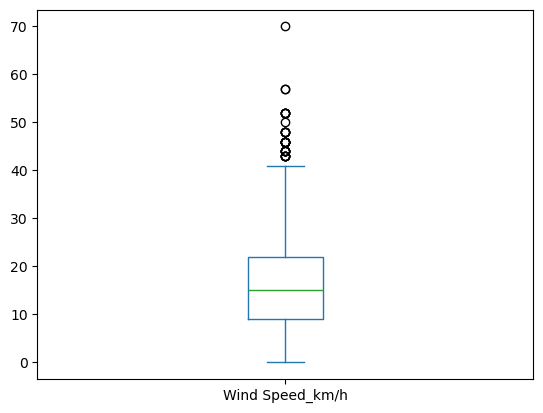

In [283]:
weather_df['Wind Speed_km/h'].plot(kind='box')

## Label Encoding for the target column

In [285]:
from sklearn.preprocessing import LabelEncoder

In [286]:
le = LabelEncoder()

In [287]:
weather_df['Std_Weather'] = le.fit_transform(weather_df['Std_Weather'])

In [288]:
# Check the data
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2129,3.5,-4.1,57,24,24.1,100.92,1
6974,12.0,2.4,52,0,48.3,100.88,1
2533,19.8,10.1,54,32,48.3,100.68,1
4731,20.8,19.2,91,7,25.0,100.52,1
8254,-3.0,-8.2,67,28,25.0,101.78,1


In [289]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    629
1    600
0    600
3    500
Name: count, dtype: int64

## X, y Variables

In [291]:
# Independent variable
X =  weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
2129,3.5,-4.1,57,24,24.1,100.92
6974,12.0,2.4,52,0,48.3,100.88
2533,19.8,10.1,54,32,48.3,100.68
4731,20.8,19.2,91,7,25.0,100.52
8254,-3.0,-8.2,67,28,25.0,101.78
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [292]:
# Independent variable
X =  weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
2129,3.5,-4.1,57,24,24.1,100.92
6974,12.0,2.4,52,0,48.3,100.88
2533,19.8,10.1,54,32,48.3,100.68
4731,20.8,19.2,91,7,25.0,100.52
8254,-3.0,-8.2,67,28,25.0,101.78
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [293]:
# Target variable

In [294]:
y = weather_df['Std_Weather']
y

2129    1
6974    1
2533    1
4731    1
8254    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2329, dtype: int64

## Feature Scaling

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
std_scaler = StandardScaler()

In [298]:
X_std = std_scaler.fit_transform(X)
X_std

array([[-0.28758036, -0.54748895, -0.97581834,  0.77116014,  0.04934415,
         0.12924113],
       [ 0.45639975,  0.0647121 , -1.29600444, -1.75475648,  1.97867117,
         0.08558118],
       [ 1.13911092,  0.78993489, -1.16793   ,  1.61313234,  1.97867117,
        -0.13271855],
       ...,
       [-0.63768865, -0.30260853,  1.32952156,  1.19214624, -1.48933401,
        -0.92951257],
       [-0.61143053, -0.33086397,  1.07337268,  1.19214624, -1.09868515,
        -0.97317252],
       [-0.59392512, -0.3591194 ,  0.88126102,  1.40263929, -0.97112634,
        -0.99500249]])

## Splitting data into training & testing

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(
  X_std,y , random_state=42,test_size=0.2)

In [302]:
X_train.shape, X_test.shape

((1863, 6), (466, 6))

## Model Building 

In [304]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

## Model Training

In [306]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

## Model Prediction

In [308]:
y_pred_dt = decision_tree_model.predict(X_test)

In [309]:
print(y_pred_dt[:5])
print(y_test.head().tolist())

[2 1 1 0 1]
[2, 0, 2, 1, 2]


## Model Evaluation

In [311]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Accuracy

In [313]:
accuracy_score(y_test, y_pred_dt)

0.6072961373390557

### Mean Average Error

In [315]:
mean_absolute_error(y_test, y_pred_dt)

0.4892703862660944

### Classificiation Report

In [317]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       114
           1       0.46      0.55      0.50       135
           2       0.66      0.63      0.65       126
           3       0.77      0.81      0.79        91

    accuracy                           0.61       466
   macro avg       0.63      0.62      0.62       466
weighted avg       0.61      0.61      0.61       466



### Confusion matrix

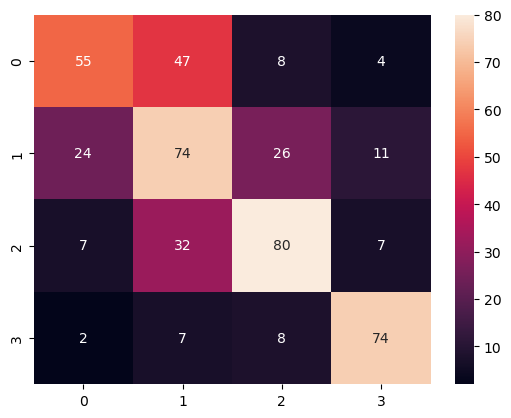

In [319]:
cm = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cm, annot=True)

## Finding the Best Model: Building and testing out differnt models

In [321]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 

In [322]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [323]:
model_list = [dt_model, rf_model, svc_model, knn_model, lr_model, nb_model]

In [324]:
acc_list=[] # Accuracy list 
for model in model_list:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)
    acc_list.append(acc_score)

In [325]:
acc_list

[0.6072961373390557,
 0.6824034334763949,
 0.6094420600858369,
 0.6094420600858369,
 0.5858369098712446,
 0.5858369098712446]

In [326]:
max_value = max(acc_list)
max_value

0.6824034334763949

In [327]:
model_df = pd.DataFrame({'Model': model_list, 'Accuracy':acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.607296
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.682403
2,SVC(),0.609442
3,KNeighborsClassifier(),0.609442
4,LogisticRegression(),0.585837
5,GaussianNB(),0.585837


### K-Fold cross validation

In [431]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model,X_std,y,cv=5,scoring='accuracy')
print('Cross-validation scores =',scores)

Cross-validation scores = [0.57081545 0.65450644 0.59227468 0.56652361 0.65806452]


In [433]:
scores.mean()

0.6084369375605705

### Hyperparameter tuning: Model tuning

In [435]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [437]:
parameters={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
}

In [439]:
grid_search = GridSearchCV(estimator=rf_model,param_grid=parameters)

### Best Hyper parameters

In [451]:
Random_forest_model_new = RandomForestClassifier(max_features='log2', n_estimators = 50)

In [453]:
Random_forest_model_new.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [459]:
y_pred_rf = Random_forest_model_new.predict(X_test)

In [465]:
accuracy_score(y_test,y_pred_rf)

0.6695278969957081

In [467]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Random_forest_model_new, X_std, y, cv=5,scoring='accuracy')
print('Cross-validation scores = ', scores)

Cross-validation scores =  [0.56652361 0.64806867 0.56866953 0.55364807 0.64301075]


In [469]:
scores.mean()

0.5959841247865614